In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches

In [2]:
#### User needs to modify this line to correspond to their local data, which can be downloaded from Hydroshare:
#### http://www.hydroshare.org/resource/dbf8e4c2a39a4c228db867b04f9c21ed
LOC_DATA_DIR = "../2023_nwm_cnn_california/"

with open(f"{LOC_DATA_DIR}csv_files/sac_county_annual_water_year_max_ensemble_water_area_km2.csv") as f:
    df_annualmax = pd.read_csv(f)
with open(f"{LOC_DATA_DIR}csv_files/ncdc_sac_damage.csv") as f:
    df_sac_damage = pd.read_csv(f)

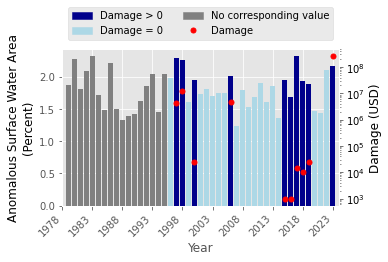

In [3]:
# Your existing code for the bar chart setup
mpl.style.use('ggplot')
plt.rcParams.update({'font.size': 10})

fig, ax = plt.subplots(figsize=(5.5, 4))

# Create patches for the legend
dark_blue_patch = mpatches.Patch(color='darkblue', label='Damage > 0')
light_blue_patch = mpatches.Patch(color='lightblue', label='Damage = 0')
grey_patch = mpatches.Patch(color='grey', label='No corresponding value')

# Iterate over the rows in df_annualmax to set bar colors
for index, row in df_annualmax.iterrows():
    year = row['water_year']
    color = 'grey'  # Default color if no corresponding value

    # Check if the year exists in df_sac_damage
    if year in df_sac_damage.year.values:
        damage_value = df_sac_damage[df_sac_damage.year == year].damage.iloc[0]
        if damage_value > 0:
            color = 'darkblue'  # Dark blue for damage > 0
        elif damage_value == 0:
            color = 'lightblue'  # Light blue/grey for damage = 0

    # Plot each bar individually with the determined color
    ax.bar(year, row['ensemble_water_area_km2_anomaly_pct'], color=color)

ax.xaxis.set_ticks(np.arange(1980, 2023, 2))
ax.tick_params(axis='both', which='major', labelsize=10)
ax.spines['bottom'].set_visible(True)

ax.set_xlim([1978, 2024])
ax.set_xticks(list(range(1978, 2024, 5)))
ax.set_xlabel("Year")
ax.set_ylabel("Anomalous Surface Water Area\n(Percent)", color="black")  # Set label color to black
plt.xticks(rotation=45, ha='right')

# Create a secondary y-axis
ax2 = ax.twinx()

# Plot the "damage" values as larger circles for each year
damage_plot, = ax2.plot(df_sac_damage.year, df_sac_damage.damage, color="red", marker="o", linestyle='None', markersize=5, label='Damage')

# Set the secondary y-axis to log scale
ax2.set_yscale('log')

# Set labels for the secondary y-axis in black color
ax2.set_ylabel("Damage (USD)", color="black")
ax2.tick_params(axis='y', labelcolor="black")

# Disable the secondary y-axis grid lines
ax2.grid(False)

# Add legend below the plot
plt.legend(handles=[dark_blue_patch, light_blue_patch, grey_patch, damage_plot], loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=2)

# Adjust layout to make room for the legend
plt.tight_layout()

# Save the figure
#plt.savefig("./figures/retrospective_with_damage.png", dpi=600)
plt.show()
plt.close()

In [6]:
# Calculate the median of the maximum water area from the df_annualmax dataframe
median_max_water_area = df_annualmax['ensemble_water_area_km2_anomaly_pct'].median()

# Merge the annual max water area dataframe with the damage dataframe on the 'water_year' column
merged_df = df_annualmax.merge(df_sac_damage, left_on='water_year', right_on='year', how='inner')

# Now, filter for entries where damage is above zero
filtered_df = merged_df[merged_df['damage'] > 0]

# From the filtered dataframe, calculate the percentage of records where the max water area is above the median
# This is done by first checking if the water area is above the median for each row, then calculating the mean of this boolean series
percentage_above_median = (filtered_df['ensemble_water_area_km2_anomaly_pct'] > median_max_water_area).mean() * 100

print(f"Percentage of maximum water area estimates above the median {median_max_water_area:.2f}% when damage is above zero: {percentage_above_median}%")

Percentage of maximum water area estimates above the median 1.80% when damage is above zero: 90.0%


In [8]:
# From the filtered dataframe, find the instances where the max water area is above the median
years_above_median_with_damage = filtered_df[filtered_df['ensemble_water_area_km2_anomaly_pct'] > median_max_water_area]

# Count how many years satisfy the criteria
number_of_years = years_above_median_with_damage.shape[0]

print(f"Number of years where the maximum water area is above the median and corresponds to a year with flood damages: {number_of_years}")


Number of years where the maximum water area is above the median and corresponds to a year with flood damages: 9
